In [1]:

import datetime as dt
import pandas as pd

In [2]:
data = pd.read_csv("Data/ThrowbackDataThursday Week 11 - Film Genre Stats.csv")

In [3]:
data.columns = ['index','genre','year','movies_released','gross','tickets_sold','ia_gross','top_movie','top_movie_gross','tm_ia_gross']

In [4]:
data.head()

,index,genre,year,movies_released,gross,tickets_sold,ia_gross,top_movie,top_movie_gross,tm_ia_gross
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [5]:
data.isnull().sum()

index              0
genre              0
year               0
movies_released    0
gross              0
tickets_sold       0
ia_gross           0
top_movie          0
top_movie_gross    0
tm_ia_gross        0
dtype: int64

In [6]:
data['genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

In [7]:
data.describe()

,index,year,movies_released,gross,tickets_sold,ia_gross,top_movie_gross,tm_ia_gross
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,149.500000,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,1.350016e+08,1.766255e+08
std,86.746758,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,1.395006e+08,1.737089e+08
min,0.000000,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,2.010000e+03,2.018000e+03
25%,74.750000,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,2.528707e+07,3.603908e+07
50%,149.500000,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,9.351396e+07,1.223360e+08
75%,224.250000,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,1.886230e+08,2.841907e+08
max,299.000000,2018.000000,287.000000,4.159138e+09,4.851841e+08,4.352101e+09,7.422089e+08,8.478831e+08


#Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

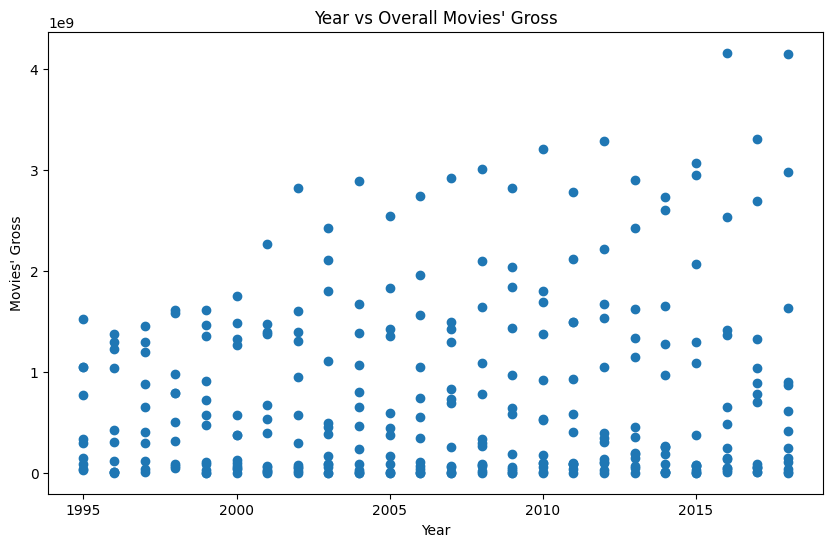

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data['year'],data['gross'])
plt.title("Year vs Overall Movies' Gross")
plt.xlabel('Year')
plt.ylabel("Movies' Gross")
plt.show()

In [10]:
genre_data = data.groupby('genre').agg({
    'gross':'sum','tickets_sold':'sum','ia_gross':'sum'
}).reset_index()

In [11]:
genre_data

,genre,gross,tickets_sold,ia_gross
0,Action,44521195322,6286733017,56391995163
1,Adventure,59706519928,8480812819,76072890986
2,Comedy,33178178901,5040638417,45214526601
3,Concert or Performance,389502940,49778298,446511334
4,Dark Comedy,1469144207,208096184,1866622769
5,Documentary,2147962688,322824020,2895731460
6,Drama,35781438365,5474189407,49103478983
7,Horror,10894902714,1572563195,14105891860
8,Multiple Genres,30056564,3676146,32975028
9,Musical,4211594934,547432661,4910470967


In [16]:
fig = px.bar(genre_data, x='genre', y='gross', labels={'genre':'Genre','gross':'Overall Gross'})
fig.show()